# Empalme con la clase anterior

Comparación entre dos tipos de CNN:

[CS231n](https://cs231n.stanford.edu/)

vs

[convolutional deep belief-networks](https://www.cs.toronto.edu/~rgrosse/icml09-cdbn.pdf)

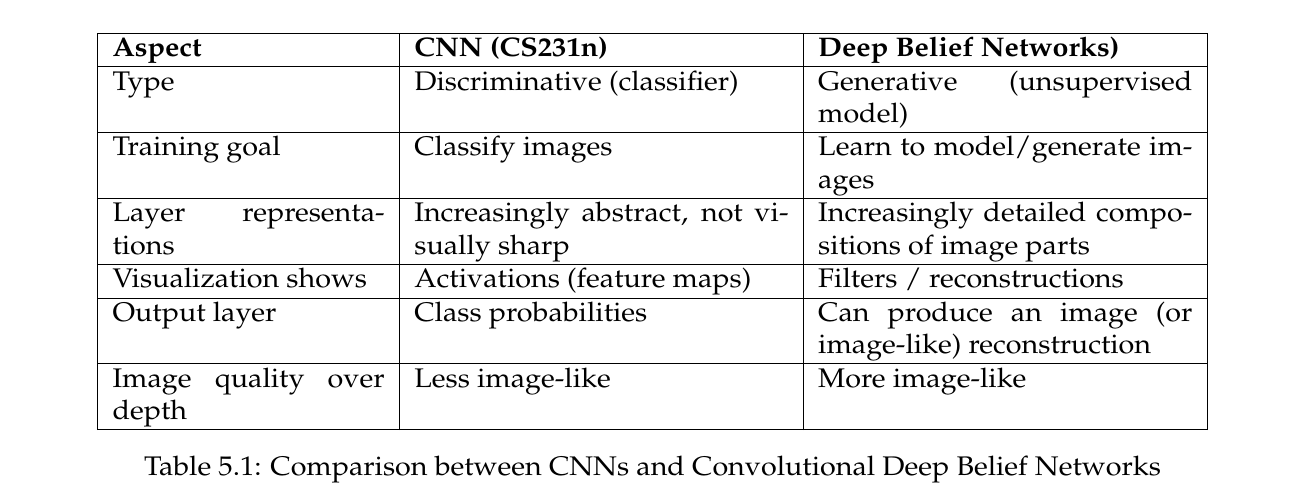

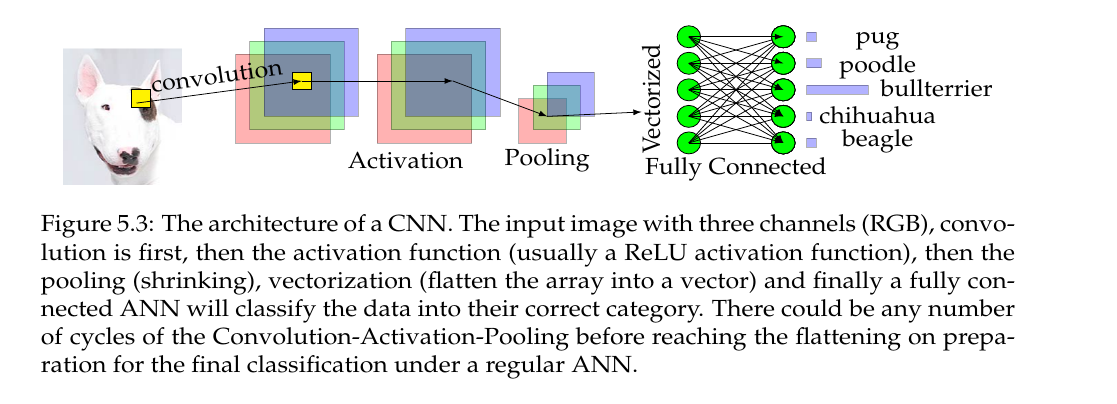

# Redes Neuronales Convolucionales (CNN: Convolutional Neural Networks).
Estudiamos las siguientes componentes de la red

* **Capa convolucional** (o convolutiva: convolutional layer)
* **Capa de activación** (Activation Layer)
* **Capa de reducción** (pooling layer)
* **Capa conectada totalmente** (fully conected. Tipo MLP)


## Capa convolucional (convolutiva. Convolutional Layer).

Ya previamene estudiamos como funciona la convolucion (correlacion).
Veamos un ejemplo.


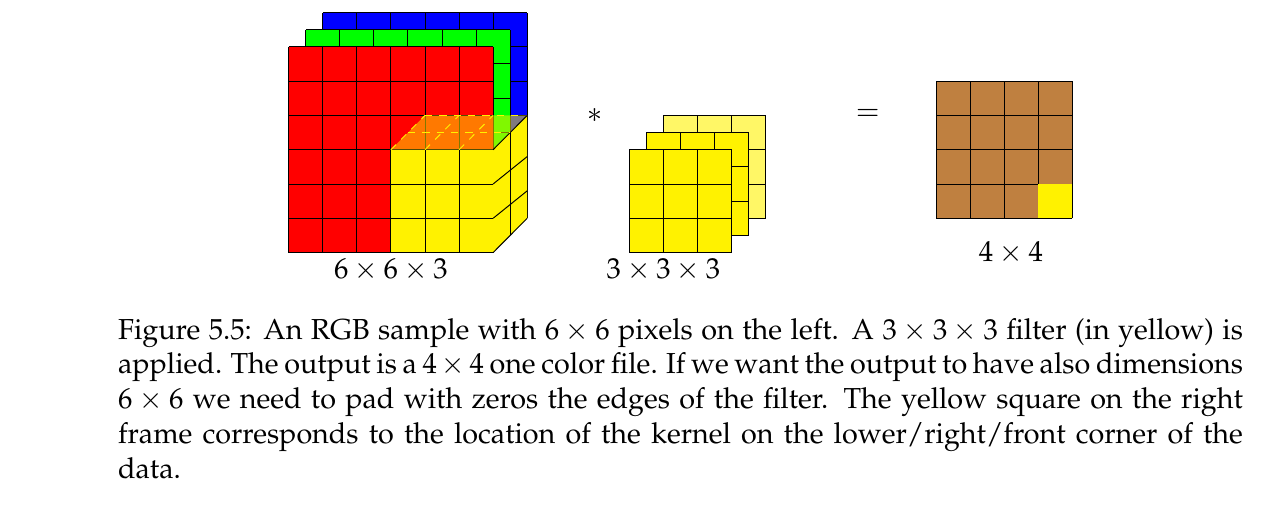

### Noacion:
Las dimensiones de los datos de entrada son "width $\times$ height $\times $ depth "
Las dimensiones del filtro (kernel). cwidth $\times$ cheight $\times $ depth
Noten que "depth" es el mismo para el numero de canales y la profundidad del kernel. La razón es que esa dimensión se quiere eliminar (quedar dimension 1)
$k_z - k_z + 1 = 1$. Ahora bien, entra otro parametro que es el número de filtros de salida. Lo estudiamos acá.


Cada salida con cada filtro nuevo se llama un "feature map".

## Ventajas del CNN:

1. Se reduce significativamente la salida con el tamaño del kernel.
Entre más grande el tamaño del kernel más se reduce la salida (ignorando padding y striding $n_{out} = n_x - k_x + 1$.
En la práctica casi no ocurre que el kernel tenga el tamaño de los datos, salvo en la profundidad "depth" como en la Figura 5.5.

2. La reducción puede ser mucho mayor si el strading $s>1$.
Ahora bien, hay que tener cuidado con esto, por que se pierde la profundidad pero se genera una produndidad con el numero de filtros de salida. Este numero debe ser limitado para no perder la ventaja comparativa.

3. La reducción es mayor cuando se introduce el **pooling** (concepto que explicaré en unos pocos minutos).

4. Aparte de todo esto, la convolución (correlación) extrae patrones de imágnes (recuerden la clase 3). En **computer vision** la convolución es importantísima.

5. A diferencias del MLP (todos con todos) las conexiones en CNN son pocas. Son el tamaño del kernel.

Es importante saber **contar** parámetros tanto como dimensiones de salida.
Vamos a hacer este ejercicio.


### Conteo de parámetros y dimensiones de salida en redes convolucionales.

Recuerden que los parámetros son los $\theta$ (que conectan una capa con la siguiente).

$$ \# \text{params} = ( \text{cwidth} \times \text{cheight} \times \text{depth} + 1) \times \text{filters} $$

**Ejemplo 5.2.1**: Asumamos que la imagen de entrada es de 24 $\times$ 24 pixeles con 3 canales (RGB). Asuma que se van usar 15 filtros.

Cuente el número de parámeros si se aplica un filtro de $3 \times 3$.

\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 3 \\
\#\text{parámetros} &=& (3 \times 3 \times 3 + 1 ) \times 15 = 420
\end{eqnarray}

Ahora bien, generemos otra capa convolucional con kernel $3 \times 3$ y 20 filtros.

\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 15 \\
\#\text{parámetros} &=& (3 \times 3 \times 15 + 1 ) \times 20 = 2720
\end{eqnarray}

Finalmente creamos una nueva capa convolutiva con kernel $3 \times 3$ y 5 filtros de salida

\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 20 \\
\#\text{parámetros} &=& (3 \times 3 \times 20 + 1 ) \times 5 = 905.
\end{eqnarray}


In [5]:
# revisamos el conteo de el ejemplo juguete (5.2.1) de arriba
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(15, (3, 3), activation='relu', input_shape=(24, 24, 3)))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 22, 22, 15)     │           420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420 (1.64 KB)

 Trainable params: 420 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

Verifiquemos la salida $p=0, s=1$
$$22 \Leftarrow (24 - 3 + 2(0))/1 + 1 = 22 $$



In [6]:
# vamos para la segunda capa
model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 22, 22, 15)     │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 20)     │         2,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,140 (12.27 KB)

 Trainable params: 3,140 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

Verifiquemos las dimensiones de la salida

$$20 \Leftarrow (22-3)/1 + 1 = 20 $$

In [7]:
# tercera capa
model.add(layers.Conv2D(5, (3, 3)))
model.summary()
#

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 22, 22, 15)     │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 20)     │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 5)      │           905 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,045 (15.80 KB)

 Trainable params: 4,045 (15.80 KB)

 Non-trainable params: 0 (0.00 B)

Contamos las dimensiones de salida.
$$18 \Leftarrow (20 - 3 + 2(0))/1 +1 =18 $$

Queda la pregunta. Cual es la fórmula cuando le agregamos el "bias".


## Capa de activación (activation layer).
Ya en el curso de ML vimos muchas activaciones: Por ejemplo

* Sigmoid Logistics
* ReLU
* Leaky ReLU
* tanh
* identidad (crea procesos lineales)
* etc.

[Keras](https://keras.io/api/layers/activations/).

Dos razones para las funciones de activación:

1. Destruir la linealidad.
2. El teorema de universalidad. Para cualquier efecto práctico, caulquier función de $\mathbb{R}^n$  en $\mathbb{R}^m$.

## Pooling Layer
Esta capa sirve para reducir el tamaño de la red (de los datos de salida y las conexiones, peso). Tiene tres funciones importanes

* Reducción de tamaño de capas y conexiones (pesos)
* Evitar el sobre-ajuste (overfitting). Explicación en minutos.
* Extrae "important features".

Que es?  Es como una convolución en el sentido de que "camina" sobre los datos con el mismo meneo, pero en vez de muliplicar y sumar (Hadamard+suma)
extrae patrones (media, el máximo).

El conteo del pooling es el mismo de la convolución.

$$\text{tamaño luego de pooling} = [ (n_x - k_x + p_x)/s_x + 1] \times [(n_y - k_y + p_y)/s_y + 1 ]$$

Hay varios tipos de "pooling" . En esta clase solo vemos 2

#### MaxPooling:
En cada paso se extrae el máximo de los elementos de entrada **cobijados** por el kernel. Por ejemplo en la Figura 5.6


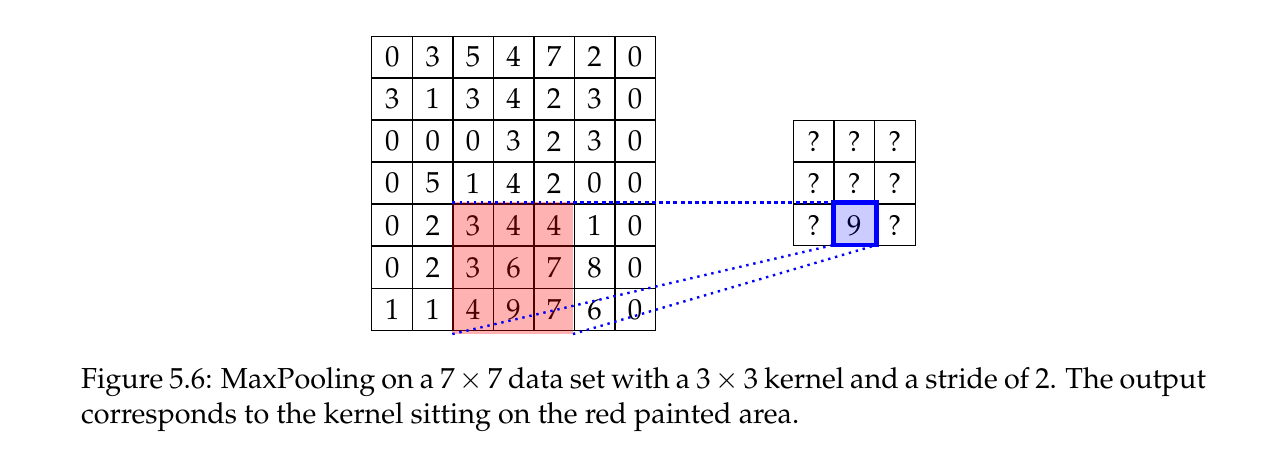

En el ejemplo de la Figura 5.6, el kernel que **cobija** los datos en rosado, tiene un mayor elemento en los datos que es 9. Ese elemento 9 va para la salida.

#### Average Pooling (reducción con promedio)
Lo mismo que el anterior, pero en vez de extraer el máximo extrae el **promedio**. La Figura 5.7 ilustra el **average pooling**


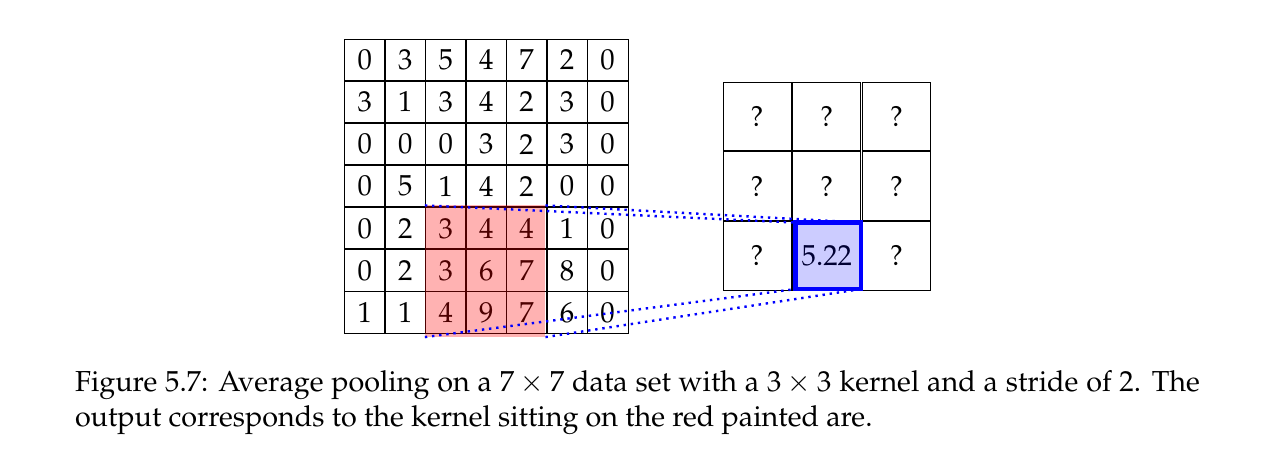

El pooling no es que tenga kernel sino una **plantilla** que desliza exactamene como si fuera convolución. En la Figura 5.7, la plantilla (rosada) sobre la matriz $3 \times 3$

$$(3+4+4 + 3 + 6 + 7 + 4 + 9 + 7)/9 \approx 5.22$$

Algo muy importante del pooling: No tiene **trainable parameters**.

Sin embargo existen unos poolings espciales dinámicos con parámeros entrenables. Pero esos están por fuera de este curso.

## Fully connected layers.
No hay mucho que decir. Que estan conectadas todos-con-todos.
Los parámetros (trainable)

$$\# \text{parámetros} = (n_i + 1) \times n_o $$
donde $n_i$ el número de nodos de entrada
donde $n_o$ el número de nodos de salida.

7:30
Nos vemos a las
8:00

## Receptive Field (campo visual).
Definimos el campo receptivo (visual) como la **apertura** que ilumina una sola neurona (nodo). Vamos a cuantificar de manera exacta esta propiedad.

[Luo, et al.](https://arxiv.org/pdf/1701.04128) tienen una descripción detallada del campo visual.

Vamos a ver un ejemplo tomado de
[James Allingham](https://github.com/JamesAllingham/LaTeX-TikZ-Diagrams).

La Figura 5.8 ulustra el ejemplo y la explicamos.


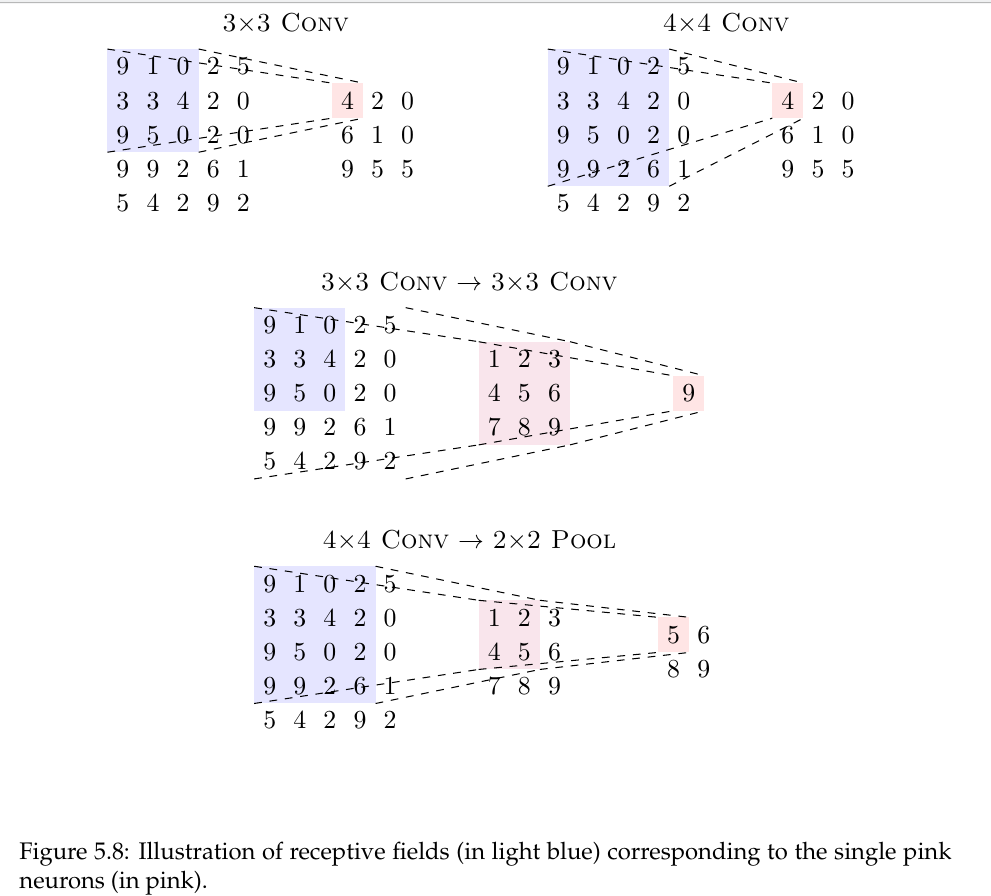

En la Fila 1 izquierda de la Figura 5.8. El "receptive field" está dado por la matriz
\begin{eqnarray}
\begin{pmatrix}
9 & 1 & 0 \\
3 & 3 & 4 \\
9 & 5 & 0
\end{pmatrix}
\end{eqnarray} en
de color violeta. Este el campo visual para el nodo (1,1) de la segunda capa.

En la segunda columna de la parte superior (fila 1 derecha)
tenemos que el campo visual es
\begin{eqnarray}
\begin{pmatrix}
9 & 1 & 0  &  2\\
3 & 3 & 4 & 2 \\
9 & 5 & 0  & 2 \\
9 & 9 & 2 & 6
\end{pmatrix}
\end{eqnarray}

La fila de la mitad es más interesante por que hay dos capas. Entre mas lejos la capa, mas grande es el campo visual.

Note que el campo visual está sobre los datos de entrada. El 9 en la tercera capa viene de la totalidad de datos de entrada. El campo visual (receptive field) consiste en **todos** los datos de entrada

\begin{eqnarray}
\begin{pmatrix}
9 & 1 & 0  &  2 & 5 \\
3 & 3 & 4 & 2  & 0 \\
9 & 5 & 0  & 2 & 0 \\
9 & 9 & 2 & 6 & 1 \\
5 & 4 & 2 & 9 & 2
\end{pmatrix}
\end{eqnarray}

Otro ejemplo intersante está en la tercera fila. Acá se combinan dos elementos que son una convolución con un "pooling" .
Vemos que el 5 en la tercera capa iene como campo receptor (receptive field).

\begin{eqnarray}
\begin{pmatrix}
9 & 1 & 0  &  2\\
3 & 3 & 4 & 2 \\
9 & 5 & 0  & 2 \\
9 & 9 & 2 & 6
\end{pmatrix}
\end{eqnarray}

No todos los puntos del campo receptivo (visual) tienen el mismo peso.
En realidad, los del centro tiene mayor contribución que los de los bordes.
la distribución en amplitudes de la importancia de aca punto en el campo visual es Gaussiana

Ver.
[Luo, et al.](https://arxiv.org/pdf/1701.04128) tienen una descripción detallada del campo visual.


Vamos a calcular cual es el tamaño de un campo receptivo.
Asumamos que el campo es cuadrado de lado $x$



asumimos padding p=0, stride s=1, tamaño del filtro $k$ (los datos tienen tamaño mayor que el filtro.

\begin{eqnarray}
\text{input} &:&  x \\
\text{capa 1} &:& x - k + 1 \\
\text{capa 2} &:& (x - k + 1) - k + 1= x - 2k + 2 \\
&\vdots &  \\
\text{capa n} &:&  x - nk + n \\
\end{eqnarray}

Ahora bien, por definición el campo receptivo corresponde a un solo nodo.
La ecuación es

$$x - nk + n = 1 $$
De acá despejamos $x$

$$x = nk - n + 1 = n(k-1) + 1  \tag{1} $$
Este es tamaño del lado de un cuadrado, campo receptivo, correspondiente a $n$ capas (convoluciones) con filtro de tamaño $k \times k$.

Veamos que en efecto la Ecuación (1) es correcta.

Ejemplo superior izquierdo.
$n=1$, $k=3$, entonces el campo receptivo es $1(3-1)+1= 3.

Ejemplo superior derecho.
$n=1, k=4$, el lado del campo receptivo es $1(4-1) + 1 = 4$.

Ejemplo del centro
$n=2$, $k=3$, entonces encontramos un campo receptivo de lado
$$2(3-1) + 1 = 5 $$

El siguiente es un
[tutorial sobre campo receptivo](https://theaisummer.com/receptive-field/)
es bastante claro, ilustrativo, completo.

## Regularización, Underfitting, Overfitting. (subajuste, sobreajuste).

Recuerden

$$(A^T A + \lambda I) x = A^T b  \quad , \quad \lambda > 0 $$
este el problema tipico de regularización con mínimos cuadrados (regresión lineal, etc).

El problema de "overfitting" se puede remediar con algunas soluciones y una de ellas es con regularización.

Si la matriz $A^T A$ tiene autovalores muy pequeños o 0, la regularización es obligaoria.  Valores singulares de $A$. Recuerden que el número de condición

$$\kappa = \frac{\sigma_1}{\sigma_n} $$
Números de condición $\kappa \gg 1$ no son buenos. Muestran inestabilidad.

Veamos un ejemplo de lo que pasa con regularización.

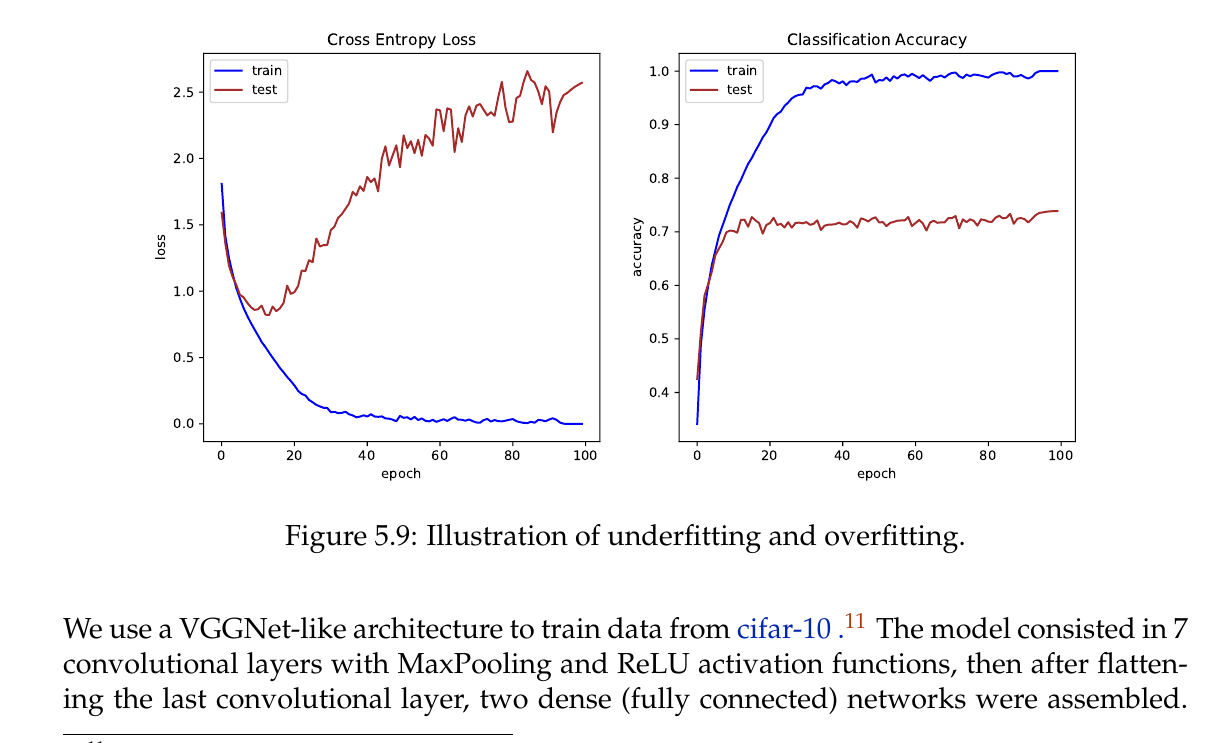

### Algunas técnicas para combatir el overfitting

*  **Más datos**:  En clases pasadas vimos como obtener cantidades de datos de la internet.  Por ejemplo:

    * Internet
        * ImageNet
        * CIFAR-10, CIFAR-100
        * Flower Data set
        * etc.
    * Data augmentation: Muchas veces no tenemos suficientes datos, entonces podemos cambiar los que tenemos con técnicas como por ejemplo
        * Rotación
        * recortes
        * ampliación.
        * reflexión
        * etc.

* **Reducción de parámeros**:
Esto lo discutiomos en el curso de ML. Por ejemplo
    * Menos capas (en ANN)
    * Menos nodos por capa
    * Polinomios de bajo grado.
    * etc.

* **Regularización**:
$$J_1(\theta) = C(\theta) + \lambda \| \theta \|_1 $$
$$J_2(\theta) = C(\theta) + \lambda \| \theta \|_2² $$
y otras.
donde $\|.\|_1$ es la norma 1 y $\| . \|_2$ es la norma 2

* **Early Stopping: parar a tiempo.** Por ejemplo en la Figura es mejor parar en la epoca 5 que seguir por más épocas.

* **Dropout**: Esta es del grupo de Geoffrey E. Hinton, de la Universidad de Toronto, 2012. Se usó en el modelo del AlexNet (lo vemos en la próxima clase).

La idea es eliminar nodos de la red de forma aleatoria. El parámetro clave acá es el **dropout rate** que es un decimal entre 0 y 1. Por ejemplo 0.2 o 0.5 (correspondientes al 20 y 50 porciento respectivamente).

El repositorio
[Dropout con TikZ](https://github.com/PetarV-/TikZ)
muestra el código en TikZ para generar la Figura 5.10



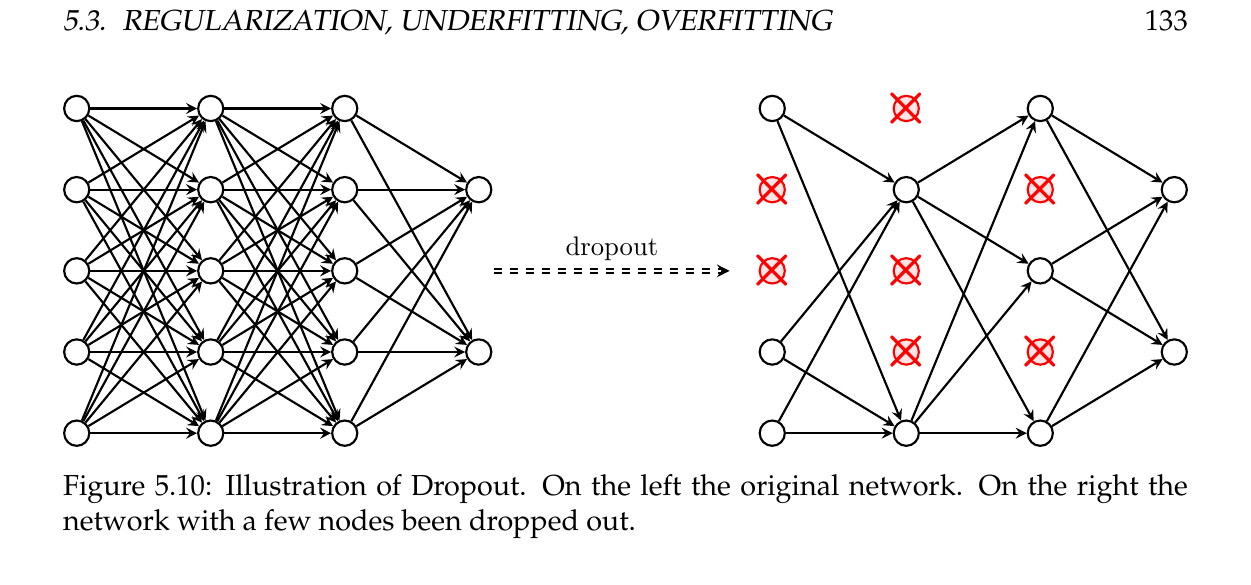

La Figura 5.11 muestra el resultado de aplicar Dropout al ejemplo de la Figura 5.9

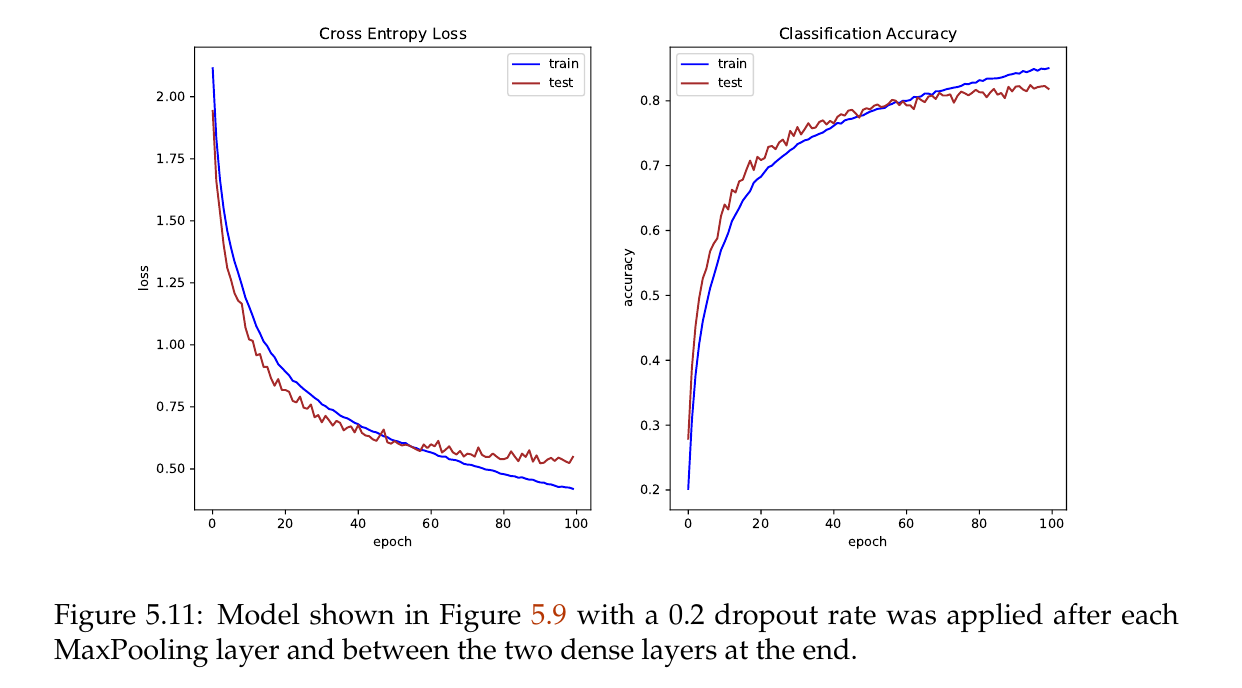

* **Batch Normalization**: Este método lo introdujeron Szegedy y amigos de Google Inc (referencia en las notas de clase).

[Artículo aća](https://arxiv.org/pdf/1502.03167).

Usar la normalización estandard (restar la media $\mu$ y dividir por la desviación estándard ($\sigma$) capa por capa. Esto también ayuda al problema de vanishing y exploding gradient. Ellos dicen que este metódo requiere 14 veces menor pasos, en el ejemplo que ellos trabajan.

# Proxima clase:
* Redes populares:
    * LeNet-5 (1998): Yann Lecun
    * AlexNet ??